In [1]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_validate
import pickle

In [4]:
#Load in dataframe
train_df = pd.read_csv('train.csv')

#Missing values relate to 3p% and ft%. Replace these with zeros. subset features
features = train_df[['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'VORP', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'ORtg', 'DRtg', 'Adj_Sal']]
features = features.fillna(0)
X = features[['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'VORP', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'ORtg', 'DRtg']]
y = features['Adj_Sal']

#split dataset into train and test data and run lasso regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = LassoCV(cv=5, random_state=0, max_iter=100000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("R^2: %f" %lasso.score(X_test, y_test))

R^2: 0.590022


Text(0.5, 1.0, 'Feature importance using Lasso Model')

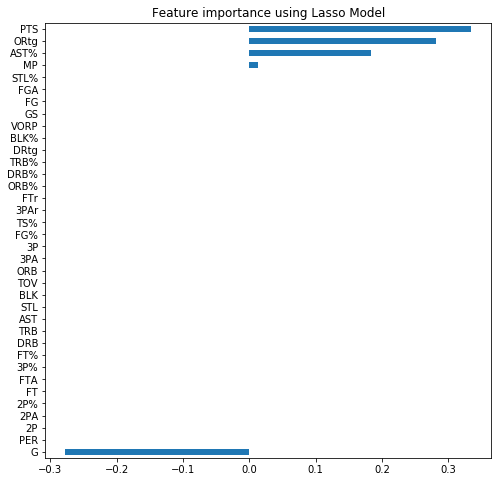

In [5]:
#Visualize feature importance
coef = pd.Series(lasso.coef_, index = X.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [6]:
#Save lasso Regression Model
filename='lasso_model.sav'
pickle.dump(lasso, open(filename, 'wb'))

In [8]:
#split dataset into train and test data and run ridge regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("R^2: %f" %ridge.score(X_test, y_test))

R^2: 0.599822


Text(0.5, 1.0, 'Feature importance using Ridge Model')

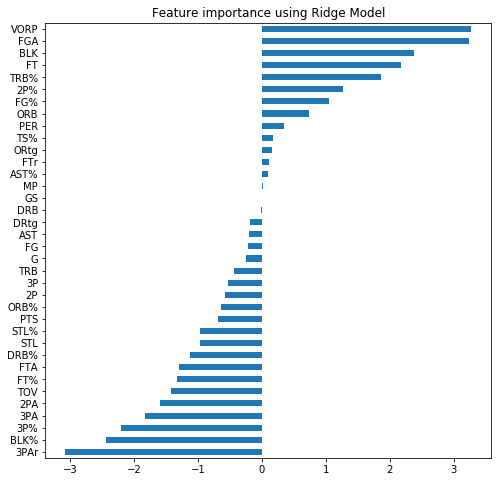

In [9]:
#Visualize feature importance
coef = pd.Series(ridge.coef_, index = X.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

In [10]:
#Save Ridge Regression Model
filename='ridge_model.sav'
pickle.dump(ridge, open(filename, 'wb'))